# Homework 8-3

---

## Imports

In [1]:
from thermostate import State, Q_, units, EnglishEngineering as EE

---

## Definitions

In [2]:
sub_v = 'water'
sub_a = 'air'

T_1 = Q_(90.0, 'degF')
p_1 = Q_(14.7, 'psi')
phi_1 = Q_(0.75, 'dimensionless')
Vdot_1 = Q_(100.0, 'ft**3/min')

Wdot_in = Q_(15.0, 'hp')

p_2 = Q_(100.0, 'psi')
T_2 = Q_(400.0, 'degF')

p_3 = p_2
T_3 = Q_(100.0, 'degF')
phi_3 = Q_(1.0, 'dimensionless')

---

## Problem Statement

The figure below shows a compressor followed by an aftercooler. Atmospheric air at 14.7 psi, 90.0 fahrenheit, and 75.00%  relative humidity enters the compressor with a volumetric flow rate of 100.0 ft<sup>3</sup>/min. The compressor power input is 15.0 hp. The moist air exiting the compressor at 400.0 fahrenheit, 100.0 psi flows through the aftercooler, where it is cooled at constant pressure to 100.0 fahrenheit. Saturated vapor and saturated liquid streams both exit the aftercooler at 100.0 fahrenheit. For steady state operation and negligible changes in kinetic and potential energy, determine

1. the rate of heat transfer from the compressor to the surroundings, in Btu/min
2. the mass flow rate of the condensate, in lb/min
3. the rate of heat transfer from the moist air to the refrigerant in the cooling coil, in tons of refrigeration

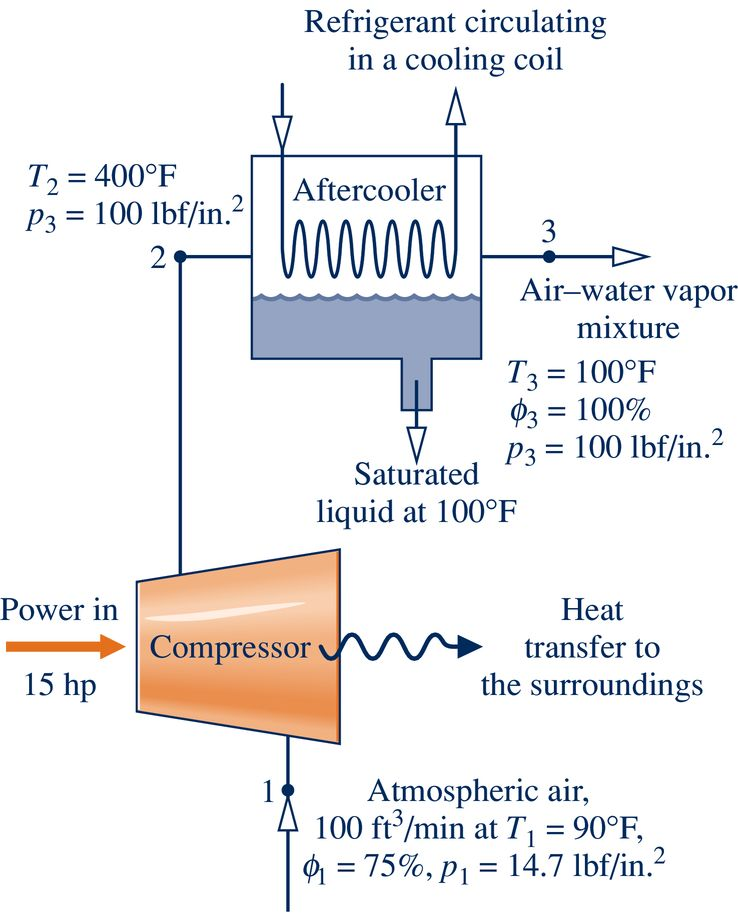

---

## Solution

### 1. the rate of heat transfer from the compressor

To find the heat transfer to the surroundings, we need to draw a control volume around the compressor. In the process in the compressor, the composition of the moist air is constant, so the humidity ratio is constant. Thus, the energy balance can be written as
$$0 = \dot{Q}_{cv} - \dot{W}_{cv} + \dot{m}_a\left[h_{a1} - h_{a2} + \omega_1 \left(h_{v1} - h_{v2}\right)\right]$$

The humidity ratio is found from the partial pressure of the water vapor, which is found from the relative humidity at the inlet.

In [3]:
MW_v = Q_(18.0, 'kg/kmol')
MW_a = Q_(28.97, 'kg/kmol')
r = MW_v/MW_a

st_g1 = State(sub_v, T=T_1, x=Q_(1.0, 'dimensionless'))
p_g1 = st_g1.p.to(EE.p)

p_v1 = phi_1*p_g1
p_a1 = p_1 - p_v1

omega_1 = (r*p_v1/(p_1 - p_v1)).to('dimensionless')

st_a1 = State(sub_a, T=T_1, p=p_a1)
h_a1 = st_a1.h.to(EE.h)
v_a1 = st_a1.v.to(EE.v)

st_v1 = State(sub_v, T=T_1, p=p_v1)
h_v1 = st_v1.h.to(EE.h)

omega_2 = omega_1
p_v2 = p_2*omega_2/(r + omega_2)
p_a2 = p_2 - p_v2

st_a2 = State(sub_a, T=T_2, p=p_a2)
h_a2 = st_a2.h.to(EE.h)

st_v2 = State(sub_v, T=T_2, p=p_v2)
h_v2 = st_v2.h.to(EE.h)

st_g2 = State(sub_v, T=T_2, x=Q_(1.0, 'dimensionless'))
p_g2 = st_g2.p.to(EE.p)
phi_2 = p_v2/p_g2

First, we need to double check that there is no condensation in the compressor. The saturation pressure at $T_2$ is $p_{g2} =$ 247 psi, and the relative humidity is $\phi_2 =$ 1.44% . Since $\phi_2 < 100\%$, the mixture is not saturated, and no condensation occurs in the compressor. Continuing to the energy balance to find the rate of heat transfer, and summarizing the states

| State |           $h_a$            |           $h_v$            |
|-------|----------------------------|----------------------------|
|     1 | 185.60 Btu/lb | 1100.63 Btu/lb |
|     2 | 260.54 Btu/lb | 1241.44 Btu/lb |


In [4]:
mdot_a = Vdot_1/v_a1

Qdot_c = (-Wdot_in + mdot_a*(h_a2 - h_a1 + omega_1*(h_v2 - h_v1))).to('BTU/min')

<div class="alert alert-success">

**Answer:** The rate of heat transfer out of the compressor to the surroundings is $\dot{Q}_{c} =$ -91.82 Btu/min

</div>

### 2. the mass flow rate of the condensate

To find the mass flow rate of the condensate, we need to find the humidity ratio at the outlet. With $\omega_3$, we can find the mass flow rate of the condensate as
$$\dot{m}_{liq} = \dot{m}_{a}(\omega_2 - \omega_3)$$

At state 3, the mixture is saturated, so $p_{v3} = p_{g3}$, or

In [5]:
st_v3 = State(sub_v, T=T_3, x=Q_(1.0, 'dimensionless'))
p_v3 = st_v3.p.to(EE.p)
omega_3 = r*p_v3/(p_3 - p_v3)
mdot_liq = mdot_a*(omega_2 - omega_3)

<div class="alert alert-success">

**Answer:** The mass flow rate of condensate is $\dot{m}_{liq} =$ 0.118 lb/min

</div>

### 3. the rate of heat transfer out of the moist air

The energy balance for the aftercooler reads as
$$0 = \dot{Q}_{ac} + \dot{m}_a(h_{a2} - h_{a3}) + \dot{m}_{v2} h_{v2} - \dot{m}_{liq} h_{liq} - \dot{m}_{v3} h_{v3}$$
Factoring out the mass flow rate of the air from the vapor streams,
$$\dot{Q}_{ac} = \dot{m}_a \left[h_{a3} - h_{a2} + \omega_3 h_{v3} - \omega_2 h_{v2}\right] + \dot{m}_{liq} h_{liq}$$
The enthalpies at state 3 are found as the saturated states at the system temperature there.

In [6]:
st_liq = State(sub_v, T=T_3, x=Q_(0.0, 'dimensionless'))
h_liq = st_liq.h.to(EE.h)

# Using the previously defined st_v3
h_v3 = st_v3.h.to(EE.h)

p_a3 = p_3 - p_v3
st_a3 = State(sub_a, T=T_3, p=p_a3)
h_a3 = st_a3.h.to(EE.h)

Summarizing the states,

| State |           $h_a$            |           $h_v$            |          $h_{liq}$          |
|-------|----------------------------|----------------------------|-----------------------------|
|     2 | 260.54 Btu/lb | 1241.44 Btu/lb | ---                         |
|     3 | 187.48 Btu/lb | 1104.70 Btu/lb | 68.03 Btu/lb |


In [7]:
Qdot_ac = (mdot_a*(h_a3 - h_a2 + omega_3*h_v3 - omega_2*h_v2) + mdot_liq*h_liq).to('refrigeration_tons')

<div class="alert alert-success">

**Answer:** The heat transfer out of the aftercooler is $\dot{Q}_{ac} =$ -3.27 ton_of_refrigeration

</div>